In [515]:
#import keras essentials and stuff
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


# Making a neural net
---
the neural net takes two input variables for now 
the genre(as one bit encoded) and a historical event (i.e second world war, vietnam war, etc).

genres are labeled as follow:

- 1	&nbsp;&nbsp;  Musical
- 2	&nbsp;&nbsp; War
- 3	&nbsp;&nbsp; Romance
- 4	&nbsp;&nbsp; Family
- 5	&nbsp;&nbsp; Comedy
- 6	&nbsp;&nbsp; Animation
- 7	&nbsp;&nbsp; Western
- 8	&nbsp;&nbsp; Sci-Fi
- 9	&nbsp;&nbsp; Short
- 10&nbsp;&nbsp; 	Action
- 11&nbsp;&nbsp; 	Biography
- 12&nbsp;&nbsp; 	History
- 13&nbsp;&nbsp; 	Crime
- 14&nbsp;&nbsp; 	Music
- 15&nbsp;&nbsp; 	Fantasy
- 16&nbsp;&nbsp; 	Horror
- 17&nbsp;&nbsp; 	Drama
- 18&nbsp;&nbsp; 	Thriller
- 19&nbsp;&nbsp; 	Adventure
- 20&nbsp;&nbsp; 	Documentary
- 21&nbsp;&nbsp; 	Mystery

and historical events are labeled as:
- second world war  = 1
- vietnam war       = 2

this spits out a release year based on genre

# Preprocessing
---
preprocessing the data is necessary to make it suitable for the neural network

In [516]:
# import neccessary stuff 
#run this from the datascience-films folder
import pandas as pd 
import numpy as np
from pathlib import Path
import openpyxl

RESOURCE_PATH = Path('../cleaned_data')

df= pd.read_csv(RESOURCE_PATH / 'Export_historical_vietnam_v2_labeled.csv',sep=',')

df.head()

,primaryTitle,movie_release_year,event_year,EVENTID,genre_label,SUMMARY,plot,numVotes,averageRating,historical_event,COUNTRY,CITY
0,No Man Left Behind,2011.0,2011-11-06,64-187,10.0,Three soldiers from Somalia's UN-backed Transi...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,vietnam war,Somalia,Mogadishu
1,No Man Left Behind,2011.0,2011-08-05,64-182,10.0,The wholesale theft of food aid was also deepe...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,vietnam war,Somalia,Mogadishu
2,No Man Left Behind,2011.0,2011-10-27,64-186,10.0,At least seven people were killed and more tha...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,vietnam war,Somalia,Mogadishu
3,No Man Left Behind,2011.0,2011-11-22,64-190,10.0,A roadside bomb explosion in Wadajir on Nov. 2...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,vietnam war,Somalia,Mogadishu
4,No Man Left Behind,2011.0,2011-11-18,64-189,10.0,Fighting in the city between AMISOM-backed gov...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,vietnam war,Somalia,Mogadishu


In [517]:
df_no_articles = df.where(df['EVENTID'].isna())
df_articles = df.where(~df['EVENTID'].isna())
df_articles = df_articles.dropna()

#lastly pop our target we want
# df['target'] = list(zip(df.movie_release_year, df.averageRating))
target = df[['movie_release_year','averageRating']]
target.averageRating=  target.averageRating.fillna(0)

/home/shivan/school/jaar_4/datascience-films/env/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [518]:
df = df.join(df.pop('historical_event').str.join(sep='').str.get_dummies().astype(bool))
df

,primaryTitle,movie_release_year,event_year,EVENTID,genre_label,SUMMARY,plot,numVotes,averageRating,COUNTRY,CITY,second world war,vietnam war
0,No Man Left Behind,2011.0,2011-11-06,64-187,10.0,Three soldiers from Somalia's UN-backed Transi...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,Somalia,Mogadishu,False,True
1,No Man Left Behind,2011.0,2011-08-05,64-182,10.0,The wholesale theft of food aid was also deepe...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,Somalia,Mogadishu,False,True
2,No Man Left Behind,2011.0,2011-10-27,64-186,10.0,At least seven people were killed and more tha...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,Somalia,Mogadishu,False,True
3,No Man Left Behind,2011.0,2011-11-22,64-190,10.0,A roadside bomb explosion in Wadajir on Nov. 2...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,Somalia,Mogadishu,False,True
4,No Man Left Behind,2011.0,2011-11-18,64-189,10.0,Fighting in the city between AMISOM-backed gov...,The Real Black Hawk Down tells the extraordin...,NaN,NaN,Somalia,Mogadishu,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Welcome Home, Soldier Boys (1972)",1972.0,1972-04-16,38-17,17.0,Aircraft had meanwhile resumed the bombing of ...,Four Vietnam veterans embark on a road trip to...,1.0,4.000000,Vietnam,Hanoi,False,True
171,Tigerland (2000),2000.0,2000-11-16,38-29,17.0,"Clinton, who was accompanied on the trip by hi...",US recruits go through basic training before g...,1301.0,3.524981,Vietnam,Hanoi,False,True
172,"Welcome Home, Soldier Boys (1972)",1972.0,1972-04-14,82-123,17.0,Three rockets fired at Tan Son Nhut airport on...,Four Vietnam veterans embark on a road trip to...,1.0,4.000000,Vietnam,Saigon,False,True
173,The Last Hunter (1980),1980.0,1979-11-21,35-35,18.0,"(ii) in , despite a ban on demonstrations, a l...","Set in 1973, a US officer goes on a dangerous ...",2.0,3.000000,Bangladesh,Dhaka,False,True


In [519]:
#get test data for input

# get numeric features and set as target
numeric_feature_names = ['genre_label','vietnam war']
numeric_features = df[numeric_feature_names]
numeric_features['genre_label'] = numeric_features['genre_label'].fillna(0)
numeric_features['genre_label'] = numeric_features['genre_label'].astype(np.int64)
numeric_features.dtypes
numeric_features.head()





/tmp/ipykernel_69034/2129585743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['genre_label'] = numeric_features['genre_label'].fillna(0)
/tmp/ipykernel_69034/2129585743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['genre_label'] = numeric_features['genre_label'].astype(np.int64)


,genre_label,vietnam war
0,10,True
1,10,True
2,10,True
3,10,True
4,10,True


# Simple linear regression model
---
this is a very simply linear regression model from sklearn to grasp the basics and just to try if it is suitable

In [520]:
#also convert
from sklearn.model_selection import train_test_split

# splits the training and test data set in 65% : 35%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(numeric_features, target, test_size = 0.35, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(113, 2)
(62, 2)
(113, 2)
(62, 2)


In [521]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')
print("\n")

y_test_predict = linear_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')
print("This model is not suitable!")

The model performance for training set
--------------------------------------
RMSE is 10.724195051418818
R2 score is 0.25776481130447904


The model performance for testing set
--------------------------------------
RMSE is 10.105923449852042
R2 score is 0.23453073069691244
This model is not suitable!


# Neural net
---
this part is for initializing the neural net

In [522]:
# convert to the features to a tensor

X_train = tf.convert_to_tensor(X_train, dtype=tf.int64)
Y_train = tf.convert_to_tensor(Y_train, dtype=tf.int64)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int64)
Y_test = tf.convert_to_tensor(Y_test, dtype=tf.int64)

X_train /= 21
X_test /= 21

In [523]:
class Neural_Net():

    def __init__(self):
        """
        Set up the neural net. 
        - input nodes: 
            - historical event
            - genre 
        - output node 
            - predicted release year
            - average predicted rating
            # - second world war label
            # - vietnam war label
        """
        self.normalizer = tf.keras.layers.Normalization(axis=-1)
        self.normalizer.adapt(X_train)

        self.sgd = tf.keras.optimizers.SGD(
            learning_rate=0.09, momentum=0.1, nesterov=False, name='SGD'
        )



        self.model = tf.keras.Sequential([
            self.normalizer,
            tf.keras.layers.Dense(2, activation='relu'),
            tf.keras.layers.Dense(5, activation='relu'),
            tf.keras.layers.Dense(2),
            tf.keras.layers.Dropout(rate=0.2)
        ])

        self.model.compile(optimizer=self.sgd, loss='mse')

    def train(self, epochs: int):
        self.history = self.model.fit(X_train, Y_train, epochs=epochs, batch_size=128)

    def evaluate(self):
        self.results = self.model.evaluate(X_test, Y_test, batch_size=65)

    
    def predict(self, input: tf.Tensor):
        print("Generate predictions for 3 samples")
        predictions = self.model.predict(input)
        print("predictions shape:", predictions.shape)
        print(f"prediction: {predictions}")

    def plot_cost(self):
        # acc = self.history.history['acc']
        # val_acc = self.history.history['val_acc']
        loss = self.history.history['loss']
        # val_loss = self.history.history['val_loss']
        epochs = range(1, len(loss) + 1)

        plt.plot(epochs, loss, 'bo', label='Training acc')
        # plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()


In [524]:
#run the model
model = Neural_Net()
2
model.train(600)
model.evaluate()
model.predict(tf.constant([13, 1]))
model.predict(tf.constant([1, 0]))



Epoch 1/600
1/1 [==============================] - 0s 212ms/step - loss: 1972231.0000
Epoch 2/600
1/1 [==============================] - 0s 2ms/step - loss: 821874048.0000
Epoch 3/600
1/1 [==============================] - 0s 1ms/step - loss: 11080544.0000
Epoch 4/600
1/1 [==============================] - 0s 2ms/step - loss: 9393322.0000
Epoch 5/600
1/1 [==============================] - 0s 2ms/step - loss: 7477707.0000
Epoch 6/600
1/1 [==============================] - 0s 2ms/step - loss: 5745912.0000
Epoch 7/600
1/1 [==============================] - 0s 2ms/step - loss: 4732745.5000
Epoch 8/600
1/1 [==============================] - 0s 2ms/step - loss: 3647924.0000
Epoch 9/600
1/1 [==============================] - 0s 2ms/step - loss: 2993921.7500
Epoch 10/600
1/1 [==============================] - 0s 2ms/step - loss: 2401364.5000
Epoch 11/600
1/1 [==============================] - 0s 2ms/step - loss: 1896640.7500
Epoch 12/600
1/1 [==============================] - 0s 1ms/step - los

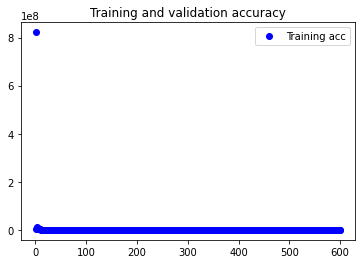

In [525]:
model.plot_cost()